In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs, make_moons
from collections import deque

In [11]:
circle_dataset = make_circles(n_samples=500, noise=0.05, factor=0.4, random_state=42)
blob_dataset = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
moon_dataset = make_moons(n_samples=500, noise=0.05, random_state=42)

In [ ]:
class DBSCAN:

    def __init__(self, eplison=0.1, min_pts=5):
        self.eplison = eplison
        self.min_pts = min_pts
        self.labels = None

    def fit(self, dataset):
        n = dataset.shape[0]
        self.labels = np.full(n, -1)
        cluster_id = 0

        for i in range(n):
            if self.labels[i] == -1:
                neighbours = self._region_query(dataset, i)
                if len(neighbours) < self.min_pts:
                    self.labels[i] = -2
                else:
                    self._expand_cluster(dataset, i, neighbours, cluster_id)
                    cluster_id += 1
        return self.labels
    
    def _region_query(self, dataset, i):
        dists = np.linalg.norm(dataset - dataset[i], axis=1)
        retVal = np.where(dists < self.eplison)[0]
        return retVal
    
    def _expand_cluster(self, dataset, i, neighbors, cluster_id):
        self.labels[i] = cluster_id
        queue = deque(neighbors)

        while queue:
            index = queue.popleft()
            if self.labels[index] == -2:
                self.labels[index] = cluster_id  # border point
            elif self.labels[index] == -1:
                self.labels[index] = cluster_id
                new_neighbours = self._region_query(dataset, index)
                if len(new_neighbours) >= self.min_pts:
                    queue.extend(new_neighbours)

In [13]:
def plot_clusters(dataset, labels, title):
    unique_clusters = set(labels)
    colours =  plt.cm.get_cmap("tab10", len(unique_clusters))

    plt.figure(figsize=(10, 10))
    for cluster in unique_clusters:
        cluster_points = dataset[np.where(labels == cluster)]
        color = 'black' if cluster == -2 else colours(cluster)
        marker = 'x' if cluster == -2 else 'o'
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, marker=marker, label=f"Cluster {cluster}" if cluster != -2 else "Noise")
    
    plt.title(title)
    plt.legend()
    plt.show()

Processing dataset: Circle


/var/folders/9d/hd3srjbx4rgbbrvnwxmcmh9c0000gn/T/ipykernel_7296/301973108.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colours =  plt.cm.get_cmap("tab10", len(unique_clusters))
/var/folders/9d/hd3srjbx4rgbbrvnwxmcmh9c0000gn/T/ipykernel_7296/301973108.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, marker=marker, label=f"Cluster {cluster}" if cluster != -2 else "Noise")


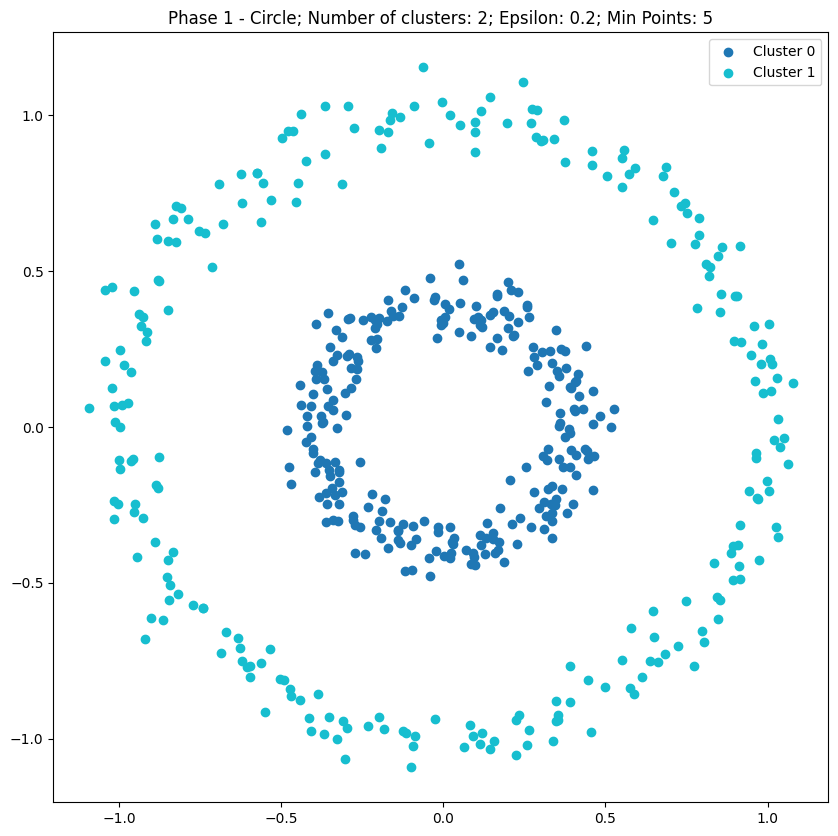

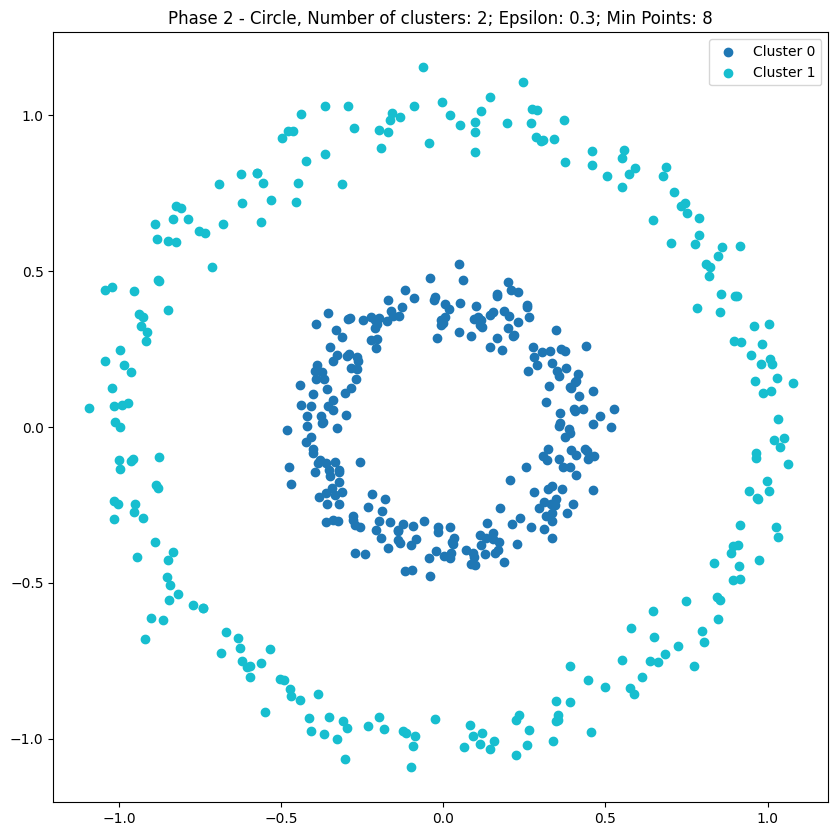

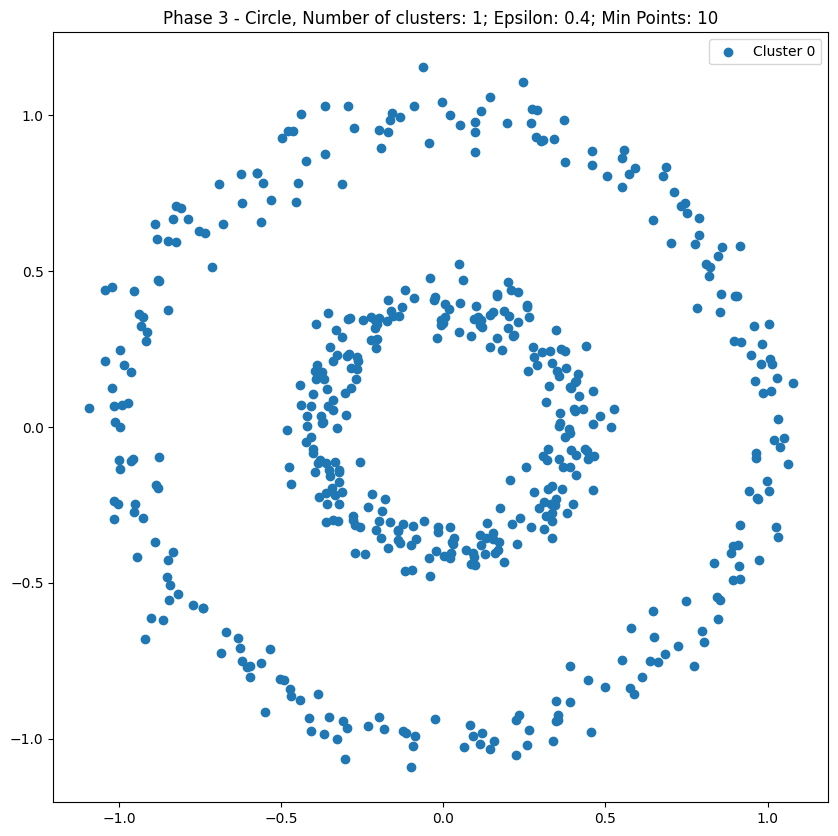

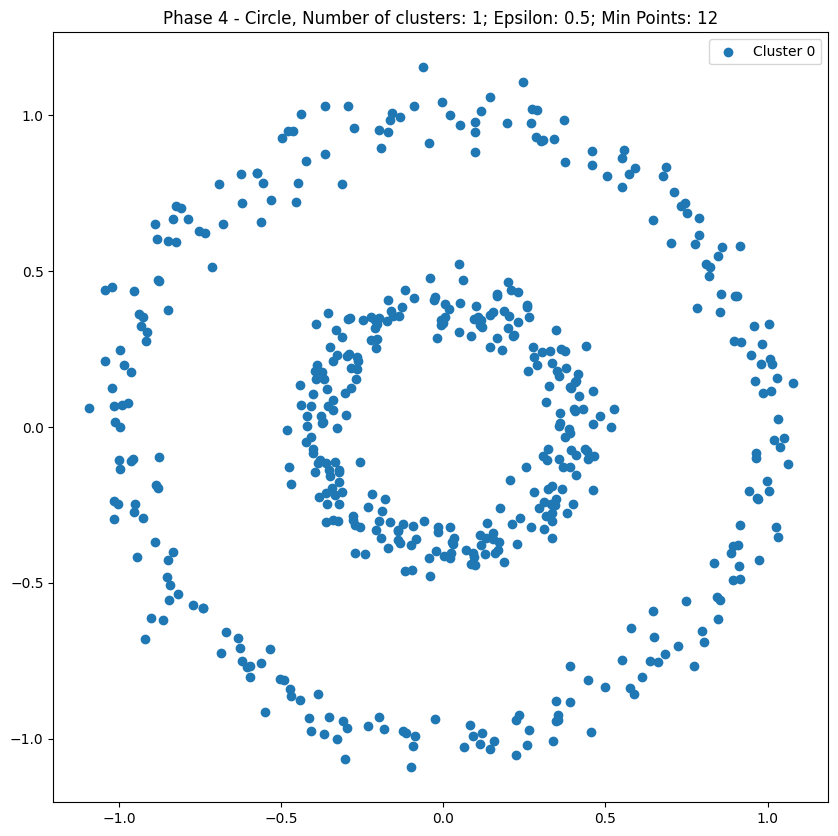

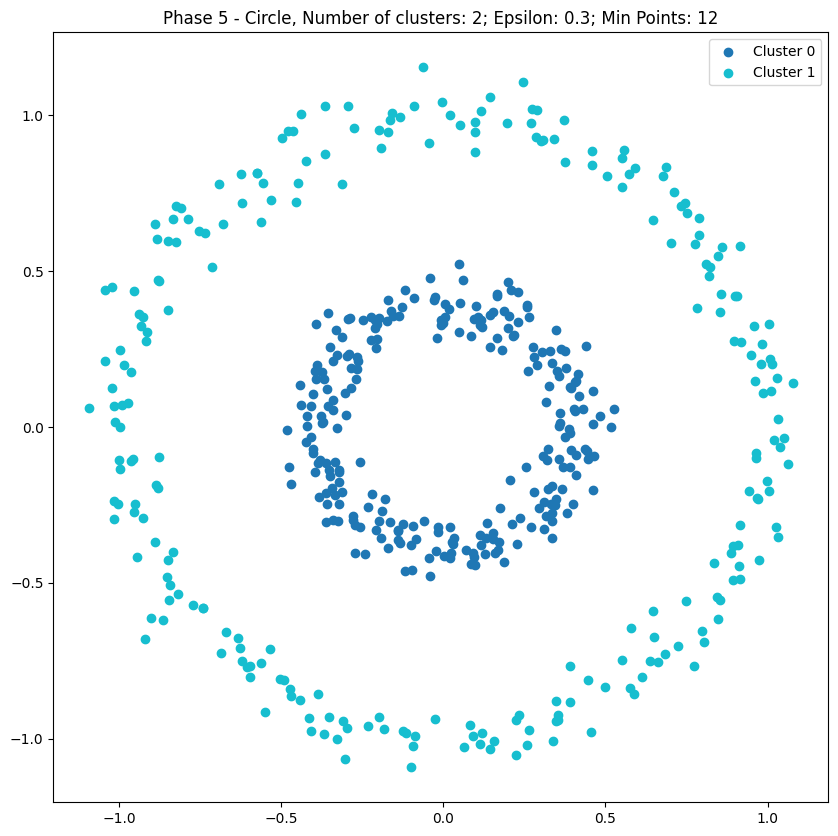

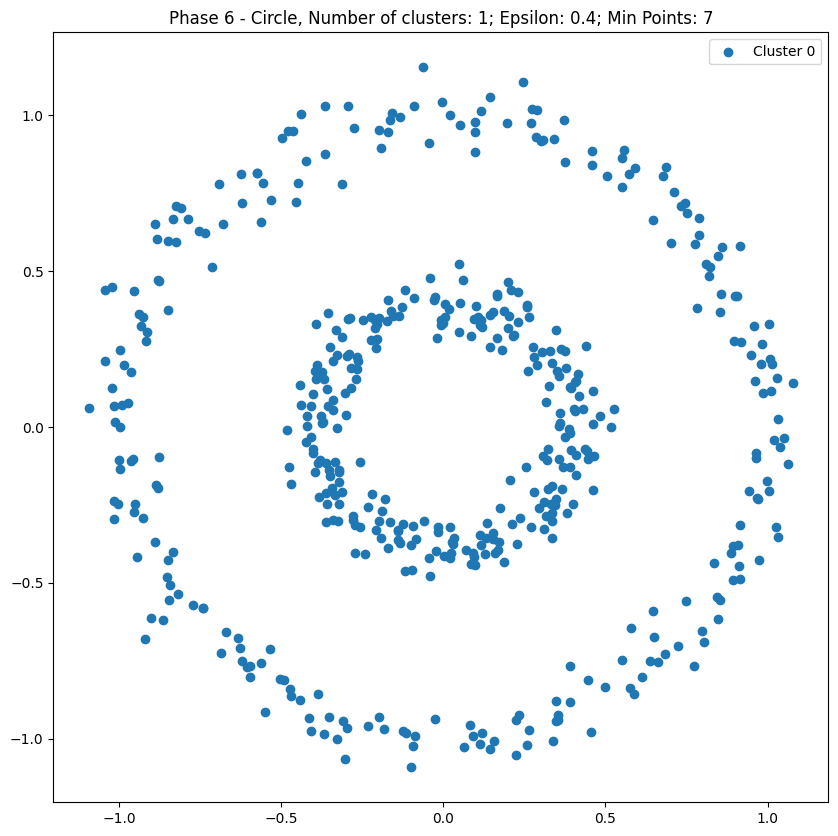

Processing dataset: Blob


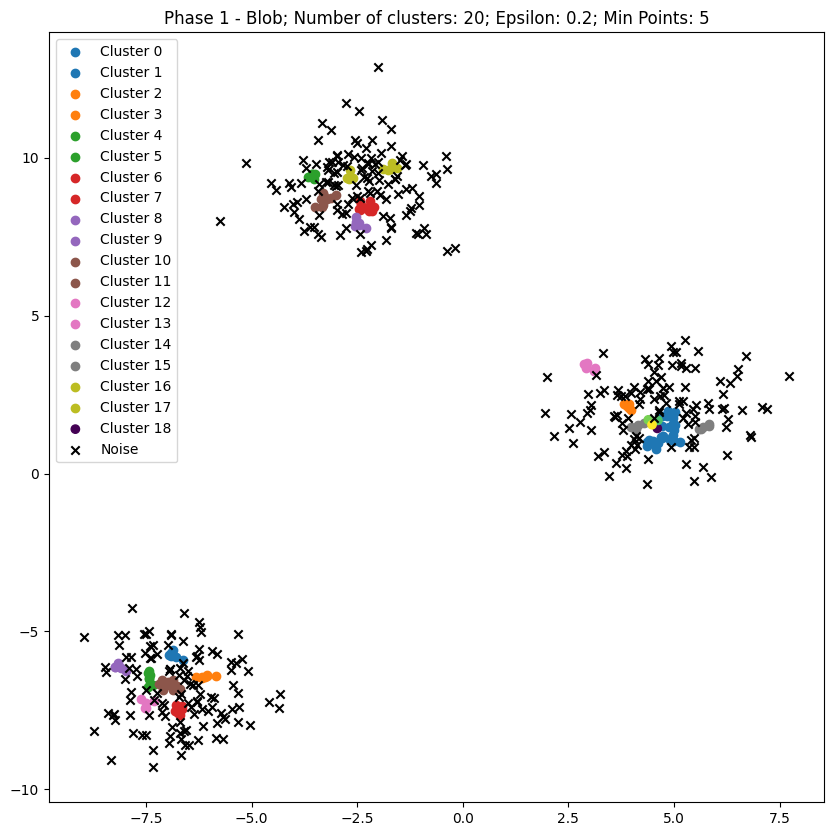

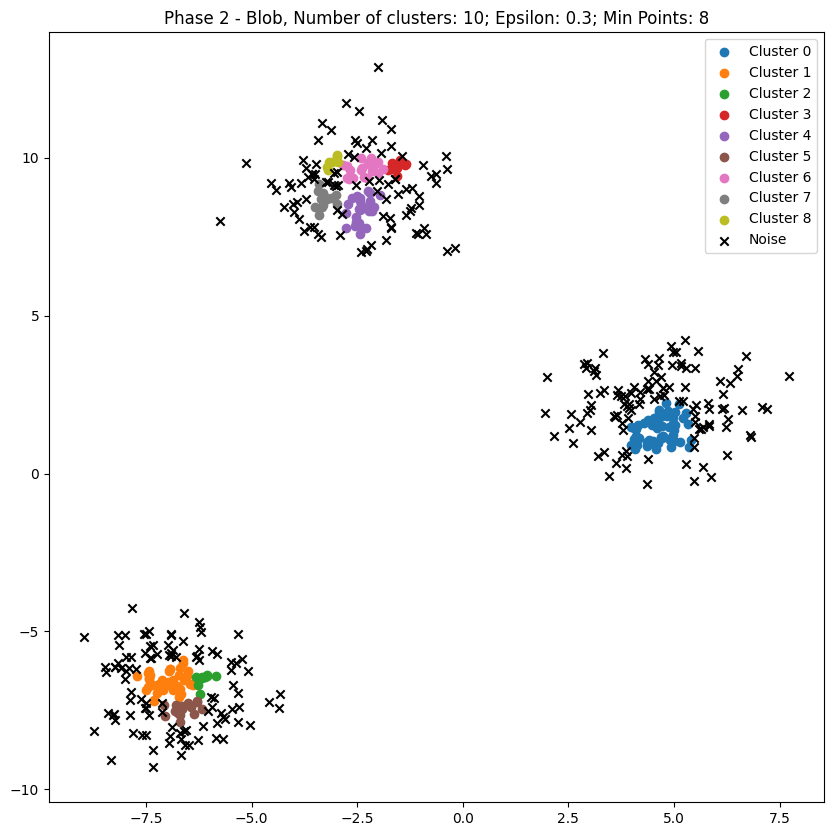

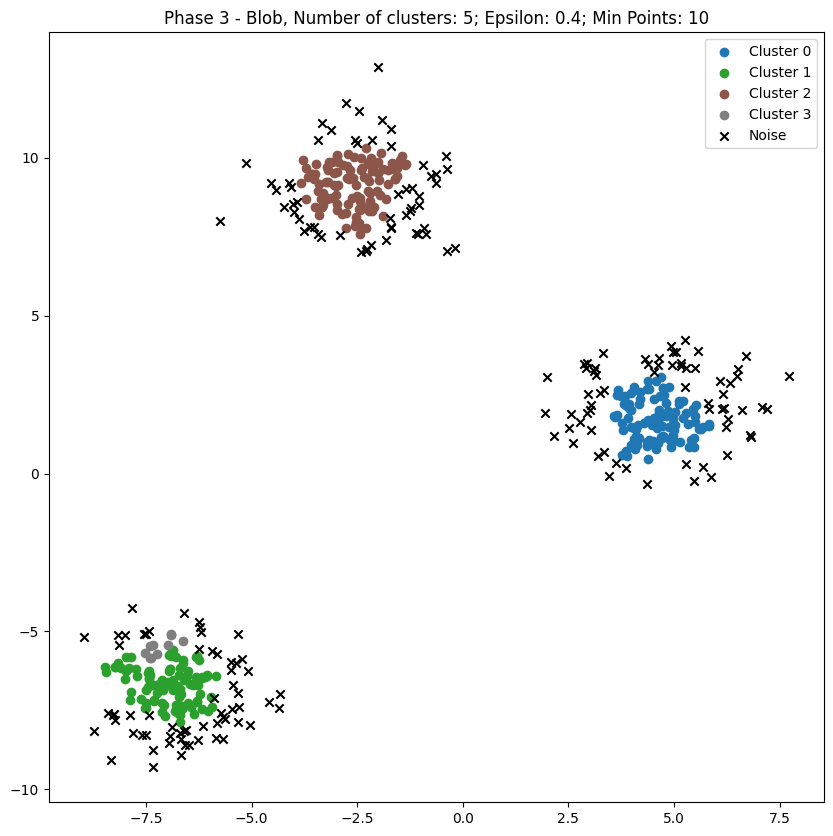

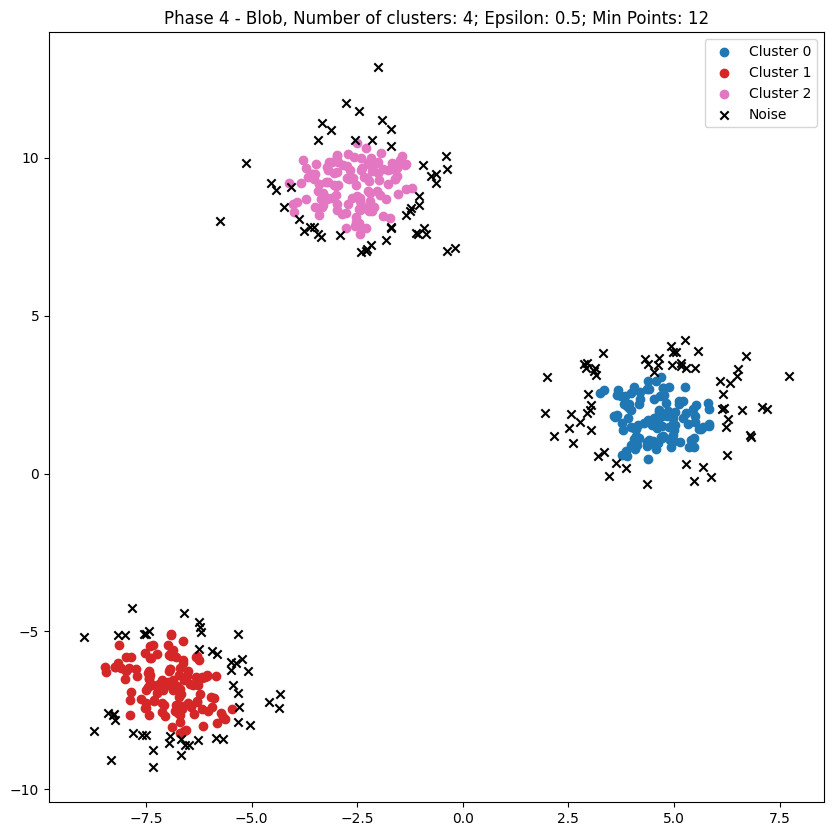

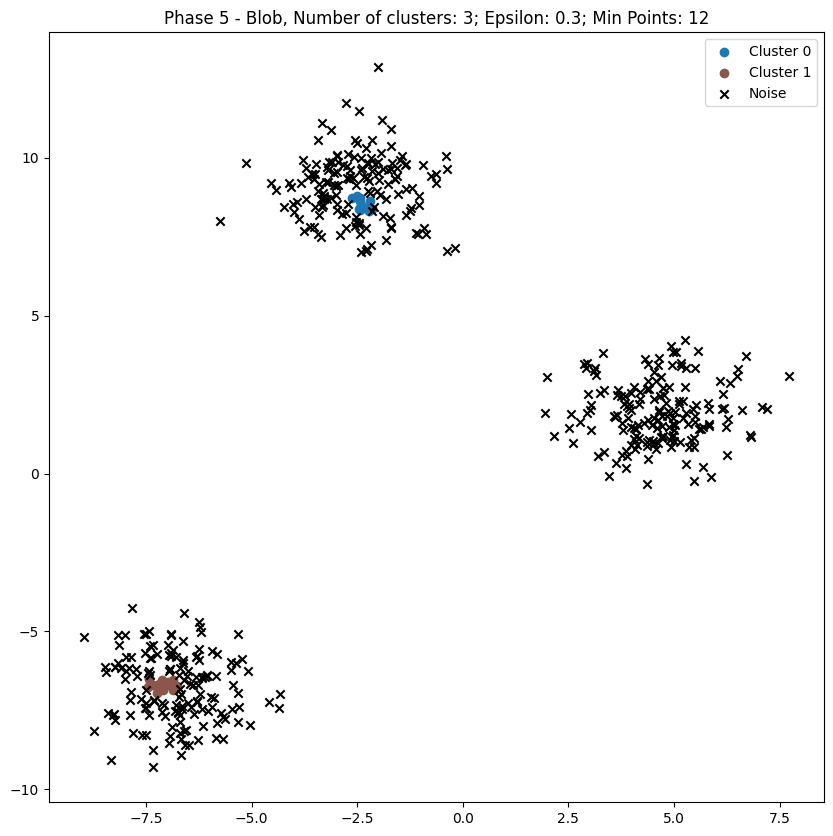

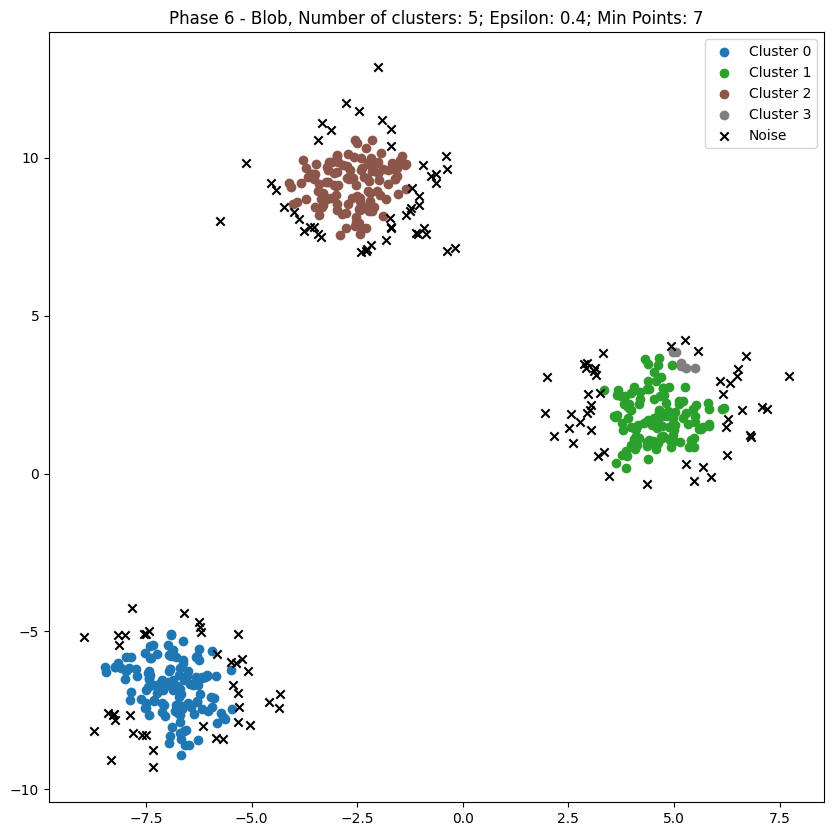

Processing dataset: Moon


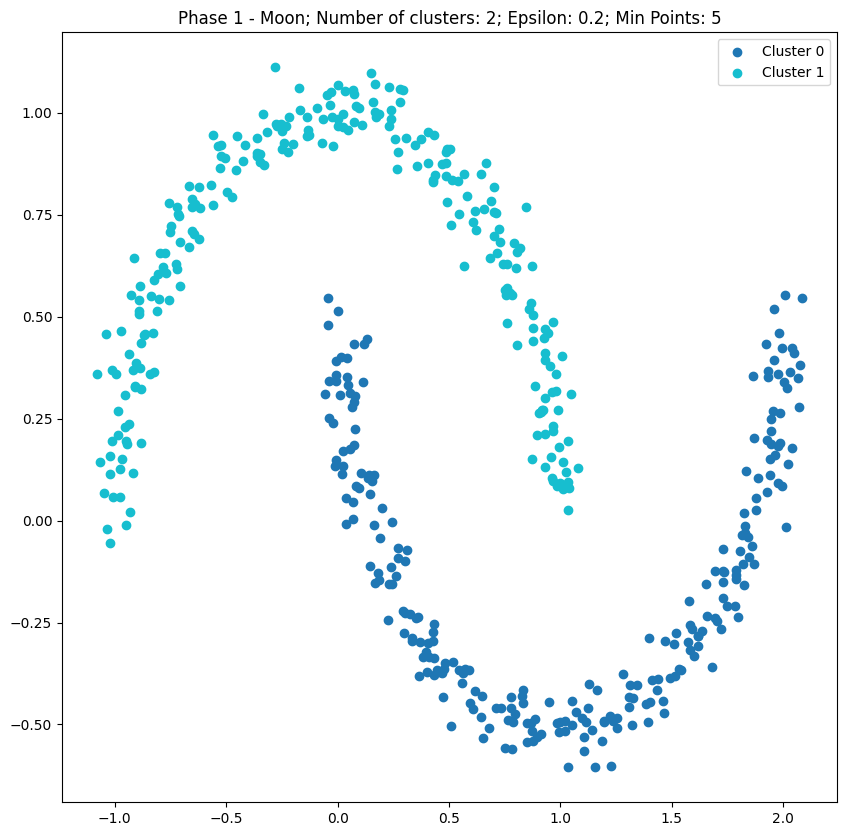

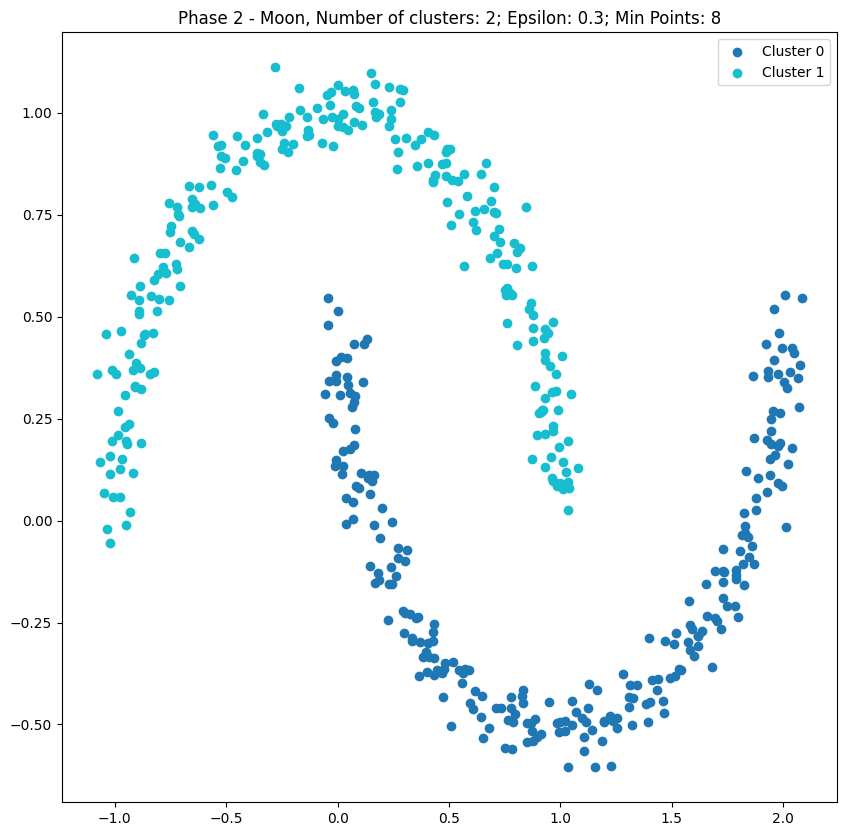

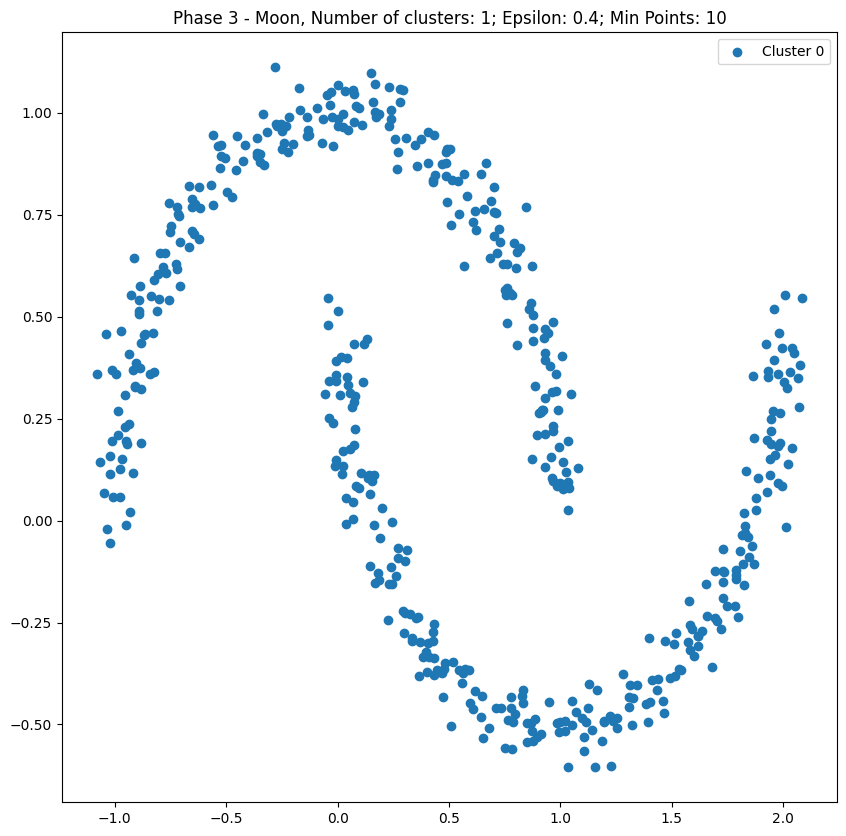

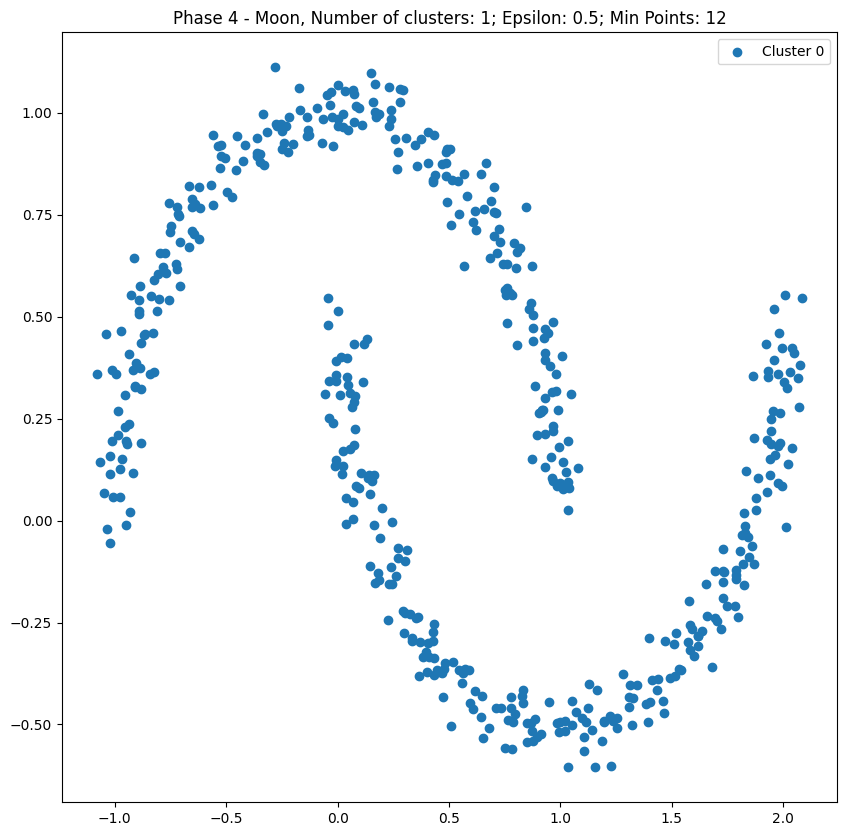

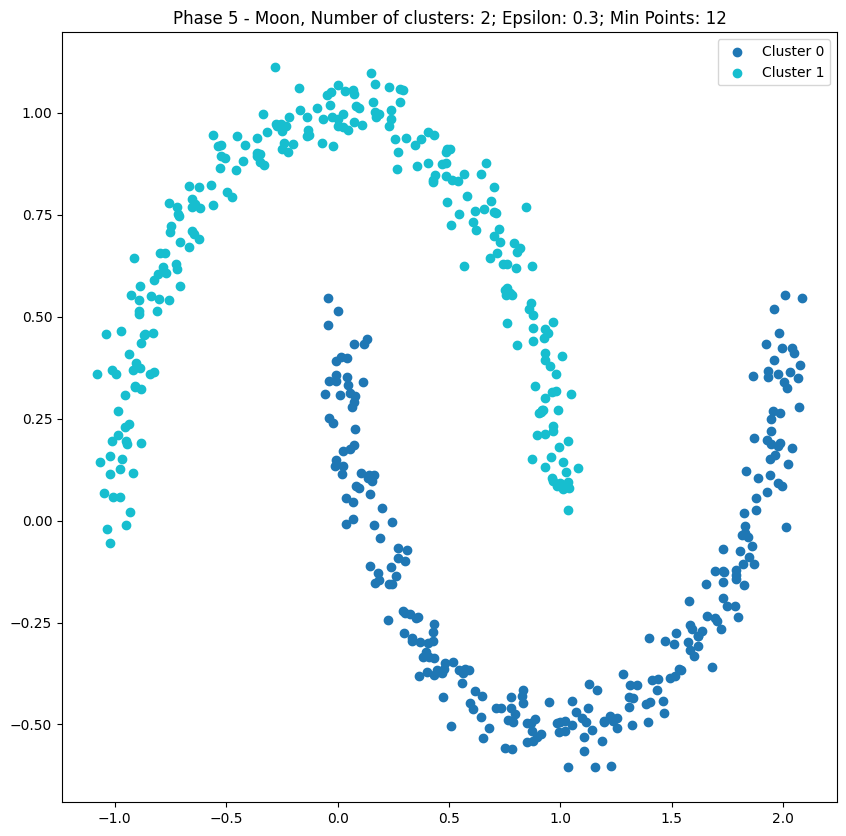

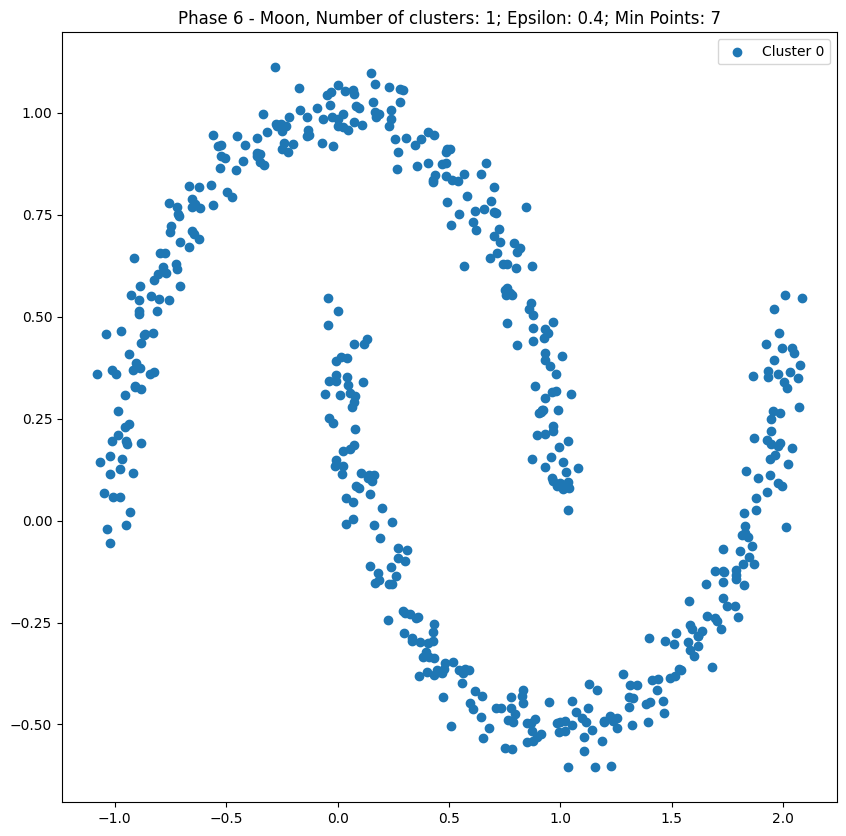

In [ ]:
phase1_params = {"epsilon": 0.2, "min_pts": 5}
phase2_params = {"epsilon": 0.3, "min_pts": 8}
phase3_params = {"epsilon": 0.4, "min_pts": 10}
phase4_params = {"epsilon": 0.5, "min_pts": 12}
phase5_params = {"epsilon": 0.3, "min_pts": 12}
phase6_params = {"epsilon": 0.4, "min_pts": 7}

names = ["Circle", "Blob", "Moon"]

for name, dataset in zip(names, [circle_dataset, blob_dataset, moon_dataset]):
    print(f"Processing dataset: {name}")

    # Phase 1
    dbscan_1 = DBSCAN(eplison=phase1_params["epsilon"], min_pts=phase1_params["min_pts"])
    labels = dbscan_1.fit(dataset[0])
    plot_clusters(dataset[0], labels, f"Phase 1 - {name}; Number of clusters: {len(set(labels))}; Epsilon: {phase1_params['epsilon']}; Min Points: {phase1_params['min_pts']}")

    # Phase 2
    dbscan_2 = DBSCAN(eplison=phase2_params["epsilon"], min_pts=phase2_params["min_pts"])
    labels = dbscan_2.fit(dataset[0])
    plot_clusters(dataset[0], labels, f"Phase 2 - {name}, Number of clusters: {len(set(labels))}; Epsilon: {phase2_params['epsilon']}; Min Points: {phase2_params['min_pts']}")

    # Phase 3
    dbscan_3 = DBSCAN(eplison=phase3_params["epsilon"], min_pts=phase3_params["min_pts"])
    labels = dbscan_3.fit(dataset[0])
    plot_clusters(dataset[0], labels, f"Phase 3 - {name}, Number of clusters: {len(set(labels))}; Epsilon: {phase3_params['epsilon']}; Min Points: {phase3_params['min_pts']}")

    # Phase 4
    dbscan_4 = DBSCAN(eplison=phase4_params["epsilon"], min_pts=phase4_params["min_pts"])
    labels = dbscan_4.fit(dataset[0])
    plot_clusters(dataset[0], labels, f"Phase 4 - {name}, Number of clusters: {len(set(labels))}; Epsilon: {phase4_params['epsilon']}; Min Points: {phase4_params['min_pts']}")

    # Phase 5
    dbscan_5 = DBSCAN(eplison=phase5_params["epsilon"], min_pts=phase5_params["min_pts"])
    labels = dbscan_5.fit(dataset[0])
    plot_clusters(dataset[0], labels, f"Phase 5 - {name}, Number of clusters: {len(set(labels))}; Epsilon: {phase5_params['epsilon']}; Min Points: {phase5_params['min_pts']}")

    # Phase 6
    dbscan_6 = DBSCAN(eplison=phase6_params["epsilon"], min_pts=phase6_params["min_pts"])
    labels = dbscan_6.fit(dataset[0])
    plot_clusters(dataset[0], labels, f"Phase 6 - {name}, Number of clusters: {len(set(labels))}; Epsilon: {phase6_params['epsilon']}; Min Points: {phase6_params['min_pts']}")

    